sympy can also be used to solver higher (than one) order differential equations. Exemplary, we look into second order equations. 

In [1]:
from sympy import Function, Symbol, Derivative, dsolve, log, exp, sin, cos, pi
from sympy.plotting import plot

Let us solve $x''(t) + 9 x(t) = 0$ subject to the initial conditions $x(0) = x_i = 2$, $x'(0) = d_i = -3$. 

The initial condition for the first derivative is implemented using using the ${\tt diff}$ method of the function $x$ to obtain the derivative and the ${\tt subs}$ methods to substitute the initial point $t_0 = 0$ for $t$. 

Eq(x(t), 0.722315118514614*exp(-0.4*t)*sin(4.98397431775085*t))


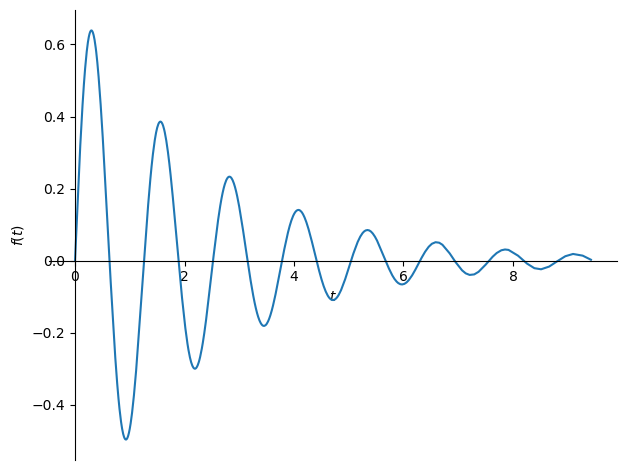

In [2]:
x = Function("x")
t = Symbol('t')

lam = 0.8
omega = 5
ode = Derivative(x(t), t, t) + lam * Derivative(x(t), t) + (omega ** 2) * x(t);

xi = 0
di = 3.6
sol = dsolve(ode, ics={x(0): xi, x(t).diff(t).subs(t, 0): di})

print(sol)
plot(sol.rhs, (t, 0, 3 * pi))

Below is a starting point to implement the solver for an initial value problem of the form $x''(t) + \lambda x'(t) + \omega^2 x(t) = a \cos(\alpha t)$, $x(0) = x_i$, $x'(0) = d_i$. 

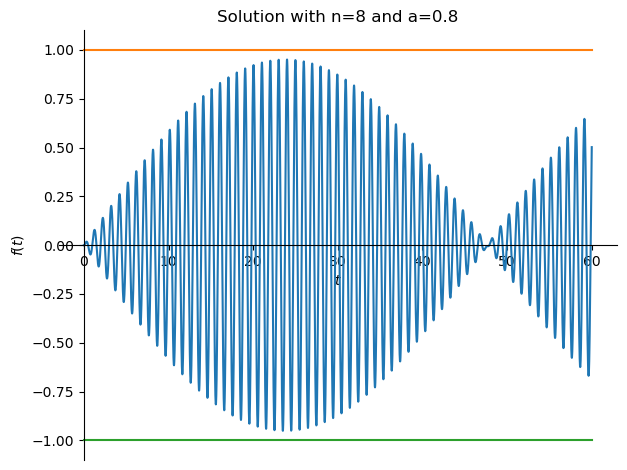

In [4]:
def solve_vibrations_ode(n: int):
    lam = 0.0009
    omega = 6.415
    a = n / 10
    alpha = 2 * pi
    ode = Derivative(x(t), t, t) + lam * Derivative(x(t), t) + (omega ** 2) * x(t) - a * cos(alpha * t);
    
    xi = 0
    di = 0
    sol = dsolve(ode, ics={x(0): xi, x(t).diff(t).subs(t, 0): di})
    
    return sol

n = 8
sol = solve_vibrations_ode(n)

from sympy.plotting import plot_parametric

p = plot(sol.rhs, (t, 0, 60), adaptive=False, nb_of_points=8000, show=False, title=f"Solution with n={n} and a={n/10}")

# Use parametric plots to add horizontal lines at y=1 and y=-1
# I'm sure there's a better way to do this, but this method works
p.extend(plot_parametric((t, 1), (t, 0, 60), show=False))
p.extend(plot_parametric((t, -1), (t, 0, 60), show=False))

p.show()